# PREPROCESSING

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 22 09:03:53 2019

@author: dlschns
"""
import re # untuk regex
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

global dfToken, dfFilter, dfStemmed

In [2]:
    def tokenisasi(a:str):
        #deklarasi list untuk hasil
        token = a.split(' ')
        char = []
        final = []
        
        #HAPUS TANDA BACA menggunakan import regex
        for i in range(len(token)):
            token[i] = token[i].lower()
            text = re.sub(r'[+)(",.:@#?!&$*\s\-]', '', token[i])
            if (text != '' or text!=' '):
                char.append(text)
        #HAPUS ANGKA menggunakan import regex
        for i in range (len(char)):
            text = re.sub(r'[0-9]', '', char[i])
            if (text != '' or text != ' '):
                final.append(text)
        #mengembalikan nilai yang sudah ditokenisasi
        return (final)

In [3]:
    def filtering(tokens:list):
        #filtering menggunakan stopword
        file = open('stopwords.txt', 'r')
        stoplist, filters = [],[]
        stoplist = file.read()
        for i in range(len(tokens)):
            if tokens[i] not in stoplist:
                    filters.append(tokens[i])
        return filters

In [4]:
    def Preprocessing(lines:list):
        # TOKENISASI
        hasilToken = []
        
        for i in range(len(lines)):
            t = tokenisasi(lines[i])
            hasilToken.append(t)
        dfToken = pd.DataFrame(hasilToken)
        
        #FILTERING
        hasilFilter = []
        for i in range(len(hasilToken)):
            f = filtering(hasilToken[i])
            hasilFilter.append(f)
        dfFilter = pd.DataFrame(hasilFilter)
        
        #STEMMING INGGRIS dgn NLTK Lemmatizer
        Lemmatize = WordNetLemmatizer()
        hasilStemming = []
        for i in range(len(hasilFilter)):
            s = list()
            for j in range(len(hasilFilter[i])):
                ss = Lemmatize.lemmatize(hasilFilter[i][j])
                s.append(ss)
            hasilStemming.append(s)
        dfStemmed = pd.DataFrame(hasilStemming)
        return hasilStemming

In [5]:
    def Pembobotan(stemmed: list):
        merge = []
        for i in range (len(stemmed)):
            for j in range (len(stemmed[i])):
                merge.append(stemmed[i][j])
        
        daftar = list(dict.fromkeys(merge))
        rawTF = defaultdict(dict)
        
        for key in daftar:
            for val in range(len(stemmed)):
                count = 0
                for i in range(len(stemmed[val])):
                    if(key == stemmed[val][i]):
                        count += 1
                rawTF[key][val] = count
        dfRawTF = pd.DataFrame(rawTF)
        return dfRawTF

In [6]:
def main():
        # membuka data yang berasal dari file txt yang tiap dokumennya dipisahkan dengan baris baru
        f = open("amazon_cells_labelled_baru.txt")
        lines = f.readlines()
        #PARSING
        lines = [line.rstrip('\t') for line in open('amazon_cells_labelled_baru.txt')]
        return lines
    
#menjalankan modul           
x = main()
PP = Preprocessing(x)
print ('----------Hasil Preprocessing:')

PP

----------Hasil Preprocessing:


[['recently', 'stay', 'connected', 'minute', 'disconnected'],
 ['phone', 'tell'],
 ['sony', 'ericsson', 'thats'],
 ['battery', 'completely', 'useless'],
 ['waste', 'time'],
 ["don't", 'waste'],
 ['mistake'],
 ['disappointment', 'calendar', 'sync'],
 ['phone', 'unusable'],
 ['worst', 'customer', 'service'],
 ['additional', 'gel', 'provided', 'instruction', 'whatsoever'],
 ['defeat', 'purpose', 'bluetooth', 'headset'],
 ['internet', 'excrutiatingly', 'slow'],
 ['product',
  'strong',
  'rubber/petroleum',
  'smell',
  'unbearable',
  'caused',
  'return'],
 ['poor', 'quality', 'service'],
 ['cable', 'look', 'flimsy', 'scary'],
 ['absolutel', 'junk'],
 ["didn't"],
 ['returned', 'hour'],
 ["don't", 'waste', 'money'],
 ['drain', 'player', 'potentially', 'fry'],
 ['perfectly'],
 ['unreliable', "i'm", 'giving'],
 ['star', 'sound', 'quality'],
 ['avoid'],
 ['reversible', 'plug'],
 ['wasted', 'little', 'money', 'earpiece'],
 ['phone'],
 ['rotating', 'feature', 'helpful'],
 ['comfort', 'family']

In [7]:
weigh = Pembobotan(PP)
global rawTF
rawTF = pd.DataFrame(weigh).transpose()

In [8]:
rawTF

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
recently,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stay,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
connected,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
minute,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
disconnected,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
phone,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
tell,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sony,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ericsson,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thats,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NAIVE BAYES MULTINOMIAL

## FASE TRAINING

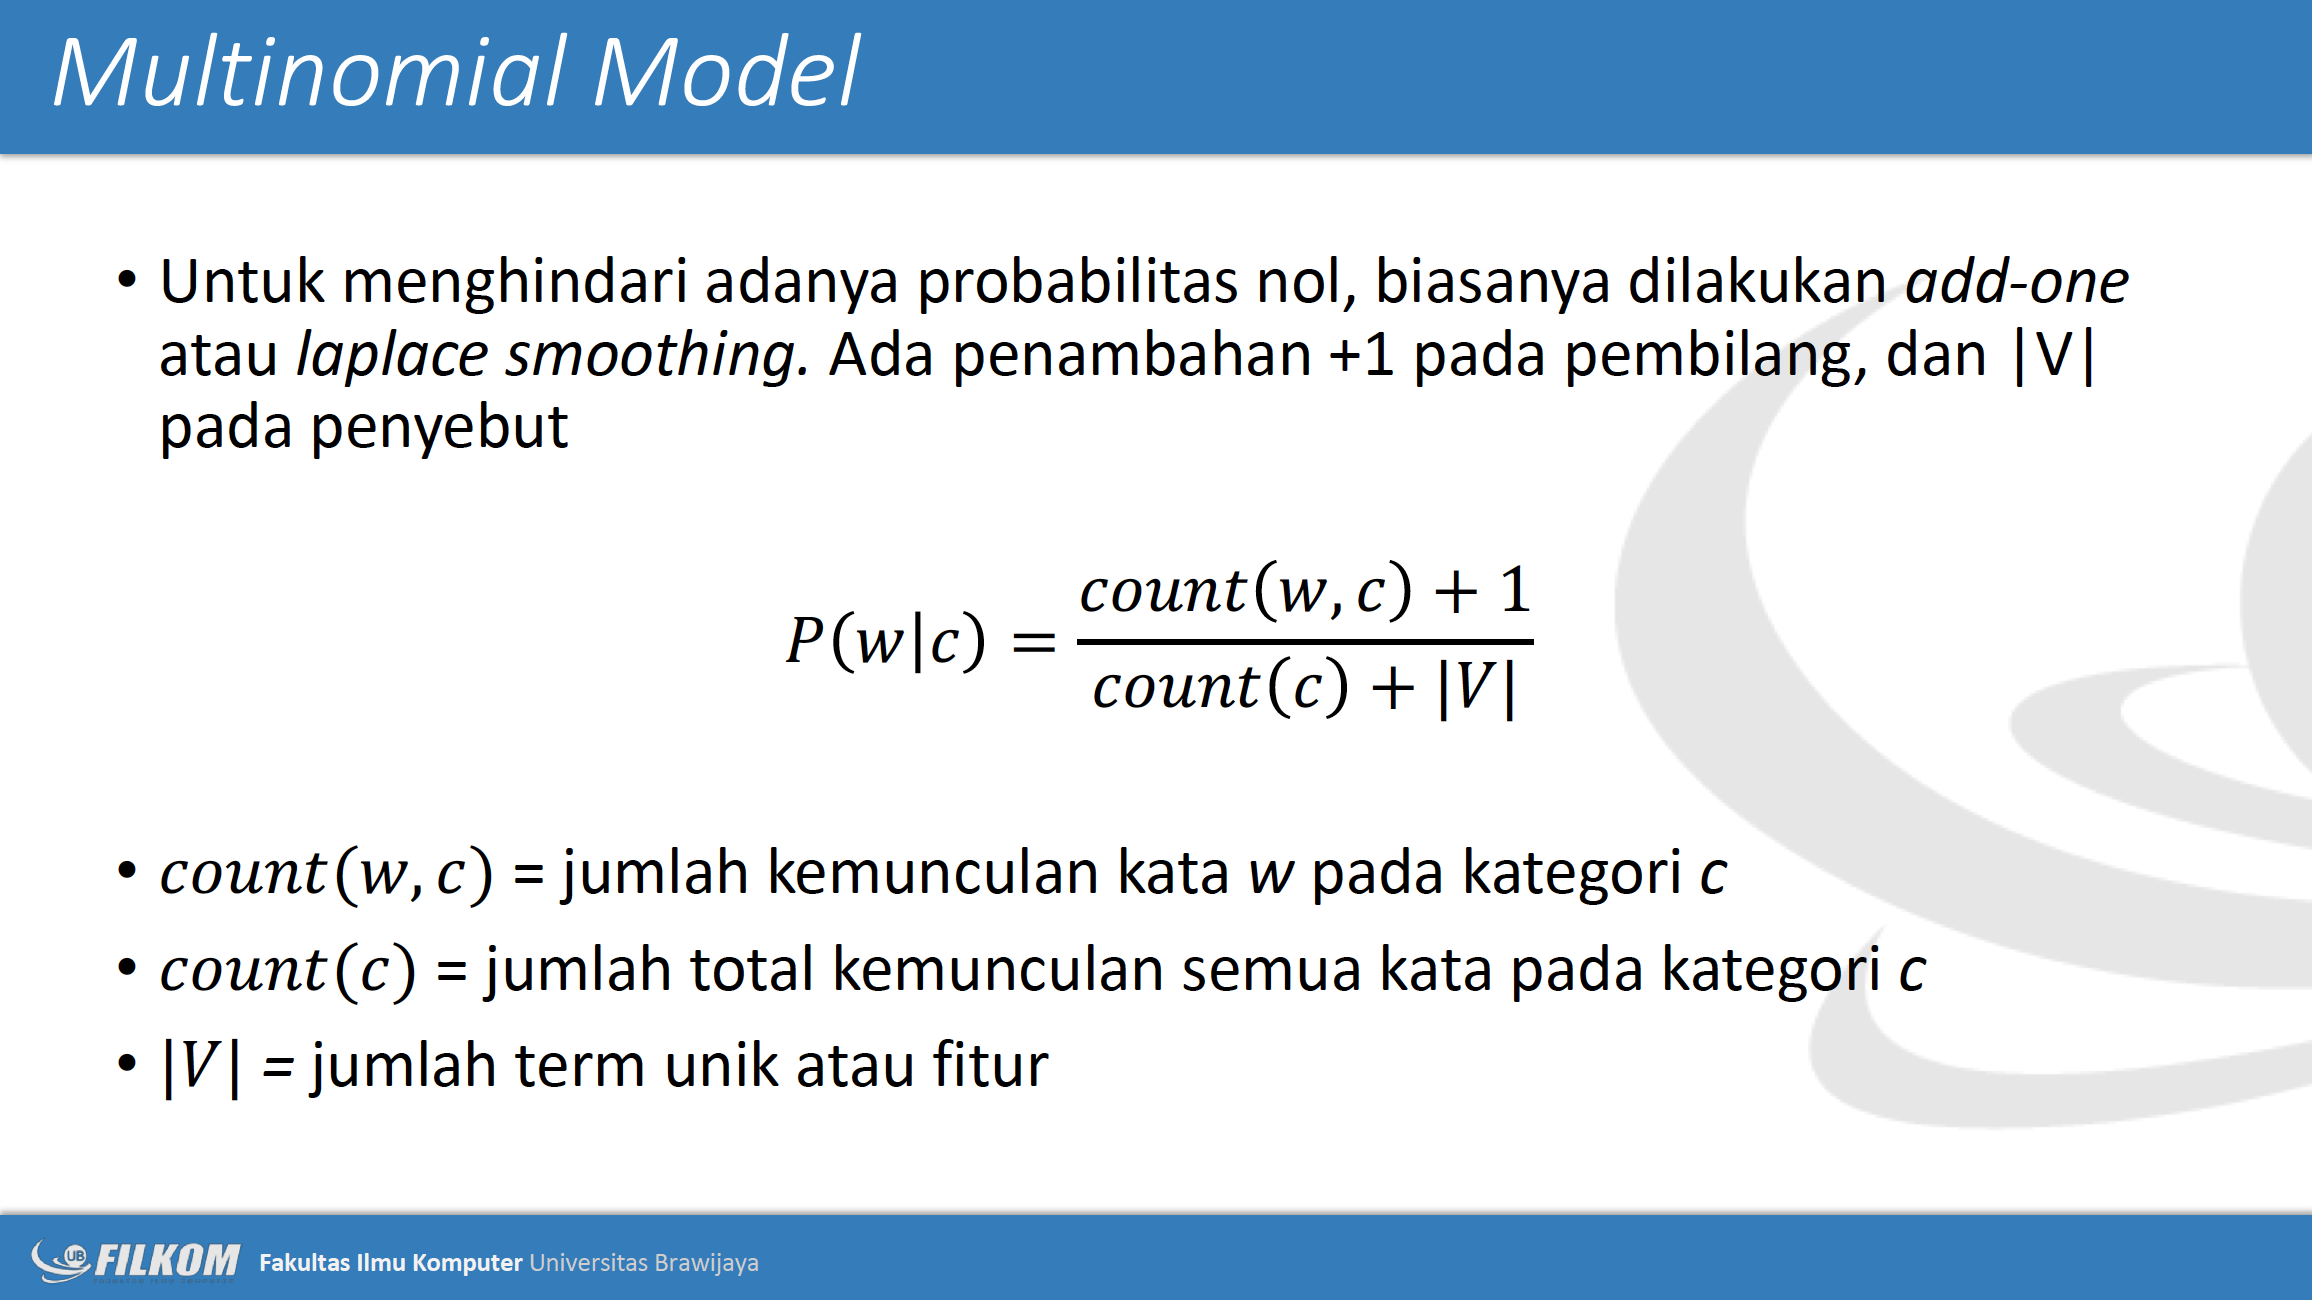

In [9]:
def OpenDok(dokumen: list):                                      
    dok = pd.DataFrame(dokumen,columns=['documents'])
    return dok

In [10]:
def Prior(c:str):
    Prior = len(Kelas(c)) / len(DFdokumen)
    return Prior

In [11]:
def Kelas (c:str):
    kelas = DFdokumen[DFdokumen['documents'].str.contains(c)]
    return kelas

In [12]:
def countWC (c:str):
    kelas = Kelas(c)
    fitur = rawTF[rawTF.columns[kelas.transpose().columns]].sum(axis=1)
    return fitur

In [13]:
def Likelihood (c):
    kataW = countWC(c)
    kataC = kataW.sum()
    pembilang = kataW + 1
    penyebut = kataC + len(rawTF)
    Likelihood = pembilang / penyebut
    
    print()
    
    return Likelihood

In [14]:
f = open("amazon_cells_labelled_baru.txt")
dokumen = f.readlines()

global DFdokumen
DFdokumen = OpenDok(dokumen)

In [15]:
PriorPositif = Prior('1')
PriorPositif

0.49466666666666664

In [16]:
PriorNegatif = Prior('0')
PriorNegatif

0.5386666666666666

In [17]:
LPositif = pd.DataFrame(Likelihood('1'), columns=['Positif'])
LNegatif = pd.DataFrame(Likelihood('0'), columns=['Negatif'])

LLHood = pd.concat([LPositif,LNegatif],axis=1)
LLHood

,Positif,Negatif
recently,0.000767,0.000698
stay,0.001151,0.002442
connected,0.000767,0.000698
minute,0.001919,0.001395
disconnected,0.000767,0.000698
phone,0.024175,0.023718
tell,0.000384,0.001046
sony,0.001535,0.001395
ericsson,0.000767,0.000698
thats,0.000767,0.000698


## FASE TESTING

In [18]:
f = open('amazontesting.txt', encoding="utf8")
test = f.readlines()

dTest = Preprocessing(test)

global dfTest
dfTest = pd.DataFrame(dTest).transpose()

dfTest

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,plug,tied,jiggle,dozen,needle,waste,seperated,design,advise,click,...,love,earpiece,excellent,using,product,month,None,battery,it's,love
1,unless,charger,plug,hundred,wasted,money,mere,odd,fooled,make,...,feature,None,hand,home,incredible,it's,None,life,item,headset
2,converter,conversation,line,contact,money,time,started,clip,None,wonder,...,form,None,free,stereo,value,flawlessly,None,None,None,None
3,None,lasting,decent,imagine,None,None,notice,comfortable,None,mechanism,...,factor,None,tool,None,None,None,None,None,None,None
4,None,minutesmajor,volume,fun,None,None,excessive,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,sending,None,None,static,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,garbled,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,sound,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,headset,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [19]:
term_uji = []
for i in dfTest.columns:
    temp = []
    for j in dfTest[i]:
        if j in list(LLHood.index) and j is not None:
            temp.append(j)
            
    term_uji.append(temp)
    
dfTerm = pd.DataFrame(term_uji).transpose()
dfTerm

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,plug,charger,plug,dozen,wasted,waste,started,design,advise,make,...,love,earpiece,excellent,using,product,month,None,battery,it's,love
1,None,conversation,line,contact,money,money,static,clip,None,None,...,feature,None,hand,home,value,it's,None,life,item,headset
2,None,lasting,decent,sending,None,time,sound,comfortable,None,None,...,form,None,free,None,None,flawlessly,None,None,None,None
3,None,None,volume,None,None,None,headset,None,None,None,...,None,None,tool,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
prior = {'Positif':PriorPositif,'Negatif':PriorNegatif}
prior

{'Positif': 0.49466666666666664, 'Negatif': 0.5386666666666666}

In [21]:
hasil = []
for i in term_uji:
    temp = {}
    for j in prior:
        temp[j] = np.prod(LLHood.loc[i,j])*prior[j]
    hasil.append(max(temp,key=temp.get))
    
hasil

['Negatif',
 'Negatif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Positif',
 'Positif',
 'Positif',
 'Positif',
 'Negatif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Positif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Positif',
 'Positif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Negatif',
 'Ne

In [22]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report

dok_asli = []
for i in test:
    if '0' in i:
        dok_asli.append("Negatif")
    else:
        dok_asli.append("Positif")
    
y_true = dok_asli
y_pred = hasil

precision_recall_fscore_support(y_true, y_pred, average=None, labels=['Negatif','Positif'])

(array([0.67226891, 0.71755725]),
 array([0.68376068, 0.70676692]),
 array([0.6779661 , 0.71212121]),
 array([117, 133], dtype=int64))

In [23]:
confusion_matrix(y_true,y_pred)

array([[80, 37],
       [39, 94]], dtype=int64)

In [24]:
accuracy_score(y_true, y_pred)

0.696

In [25]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

     Negatif       0.67      0.68      0.68       117
     Positif       0.72      0.71      0.71       133

    accuracy                           0.70       250
   macro avg       0.69      0.70      0.70       250
weighted avg       0.70      0.70      0.70       250



In [26]:
print(accuracy_score(y_true, y_pred))

0.696
